In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))



In [101]:
wsb_df = pd.read_csv('Clean_WSB.csv')




### Convert timestamp to datetime ### 
wsb_df['timestamp'] = wsb_df['timestamp'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
wsb_df['title'] = wsb_df['title'].astype(str)
wsb_df['date'] = wsb_df['timestamp'].apply(lambda x: x.date())
wsb_df['date_hour'] = wsb_df['timestamp'].apply(lambda x: f"{x.date()} {x.hour}:00:00")
wsb_df['date_hour'] = wsb_df['date_hour'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))




### apply RE to remove emojis, punc., stopwords; explode title for easy groupby counting ###
wsb_df['title'] = wsb_df['title'].map(lambda x: re.sub(r"[^A-Za-z ]", '', x))
wsb_df['title'] = wsb_df['title'].map(lambda x: x.lower().split(' '))

wsb_df_explode = wsb_df.explode('title')

wsb_df_explode =  wsb_df_explode[ ~wsb_df_explode['title'].isin(stopwords)]


### narrow specific securities ###
wsb_full = wsb_df_explode.replace({'gamestop': 'gme', 'nokia': 'nok', 'dogecoin': 'doge', 
                                         'bitcoin': 'btc', 'amazon': 'amzn', 'microsft': 'msft',
                                         'tesla': 'tsla', 'indexsp': 'sp500', '500': 'sp500', 'sp': 'sp500'})

wsb_full

,Unnamed: 0,title,author,scores,comments,timestamp,date,date_hour
0,0,whats,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 04:00:00
0,0,going,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 04:00:00
0,0,pltr,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 04:00:00
1,1,need,toutoucnc,1,2,2021-02-16 04:53:09,2021-02-16,2021-02-16 04:00:00
1,1,explanations,toutoucnc,1,2,2021-02-16 04:53:09,2021-02-16,2021-02-16 04:00:00
...,...,...,...,...,...,...,...,...
572905,579472,hear,cheaptissueburlap,1,0,2020-12-31 16:21:52,2020-12-31,2020-12-31 16:00:00
572905,579472,f,cheaptissueburlap,1,0,2020-12-31 16:21:52,2020-12-31,2020-12-31 16:00:00
572906,579473,ive,1A9D6,1,6,2020-12-31 16:21:36,2020-12-31,2020-12-31 16:00:00
572906,579473,waiting,1A9D6,1,6,2020-12-31 16:21:36,2020-12-31,2020-12-31 16:00:00


In [102]:
wsb_df_groupby = wsb_full.groupby(['title']).count().reset_index()
wallstreetbets = wsb_df_groupby.sort_values('author', ascending = False)

wallstreetbets = wallstreetbets.drop(0)
wallstreetbets = wallstreetbets.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp', 'date'], axis =1)
wallstreetbets = wallstreetbets.rename(columns = {'title':'title','date_hour': 'count'})
wallstreetbets.head(30)

,title,count
27920,gme,102785
2081,amc,45965
9990,buy,45884
31969,hold,38734
58782,robinhood,29909
44758,moon,26679
35011,im,24674
66239,stock,23792
47379,nok,20994
40163,like,17808


In [103]:
### Big movers: GME, NOK, AMC, Dogecoin ### 
### Other popular stocks: bitcoin, AMZN, MSFT, TSLA ###
### Also SMP 500 and stock indexes. ###


gme = wallstreetbets[wallstreetbets['title'] == 'gme']
nok = wallstreetbets[wallstreetbets['title'] == 'nok']
amc = wallstreetbets[wallstreetbets['title'] == 'amc']
doge = wallstreetbets[wallstreetbets['title'] == 'doge']
btc = wallstreetbets[wallstreetbets['title'] == 'btc']
amzn = wallstreetbets[wallstreetbets['title'] == 'amzn']
msft = wallstreetbets[wallstreetbets['title'] == 'msft']
tsla = wallstreetbets[wallstreetbets['title'] == 'tsla']
sp500= (wallstreetbets['title'] == 'sp500')


stonks = wallstreetbets[(wallstreetbets['title'] == 'gme') | (wallstreetbets['title'] == 'nok') | 
                       (wallstreetbets['title'] == 'amc') | (wallstreetbets['title'] == 'doge') | 
                       (wallstreetbets['title'] == 'btc') | (wallstreetbets['title'] == 'amzn') |
                       (wallstreetbets['title'] == 'msft')| (wallstreetbets['title'] == 'tsla') |
                       (wallstreetbets['title'] == 'sp500')].sort_values('count', ascending = True)
stonks

,title,count
64721,sp500,30
45554,msft,44
2552,amzn,619
9386,btc,1578
72136,tsla,2717
18968,doge,15703
47379,nok,20994
2081,amc,45965
27920,gme,102785


Text(0, 0.5, 'Securities')

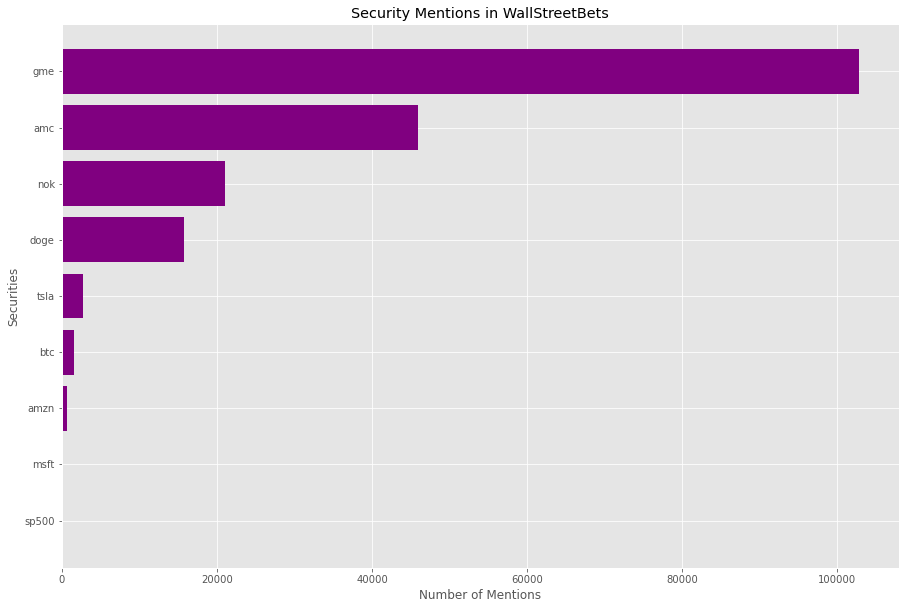

In [104]:
fig, ax = plt.subplots(figsize = (15,10))
x = stonks['title']
y = stonks['count']
ax.barh(x,y, color='purple')
ax.set_title('Security Mentions in WallStreetBets')
ax.set_xlabel('Number of Mentions')
ax.set_ylabel('Securities')

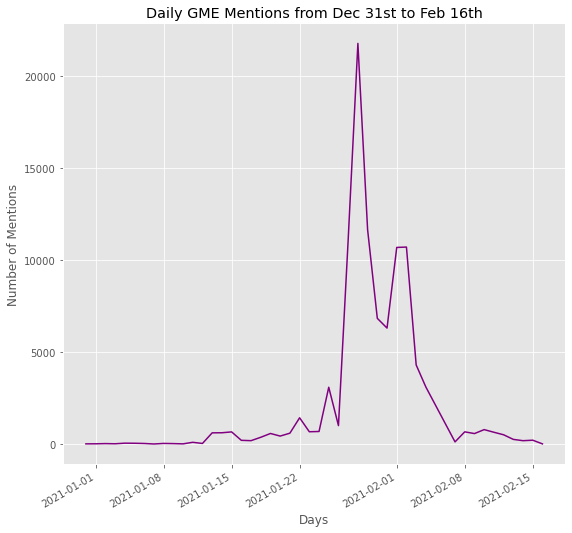

In [133]:
gme_date = wsb_full.groupby(['title','date']).count().reset_index()
gme_date = gme_date[gme_date['title'] == 'gme']

gme_date = gme_date.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_date = gme_date.rename(columns = {'title':'title','date' : 'date', 'date_hour': 'count'})


x = gme_date['date']
y = gme_date['count']

fig, ax = plt.subplots(figsize = (9,9))
ax.plot(x,y, color = 'purple')
ax.set_title('Daily GME Mentions from Dec 31st to Feb 16th')
ax.set_xlabel('Days')
ax.set_ylabel('Number of Mentions')
fig.autofmt_xdate()


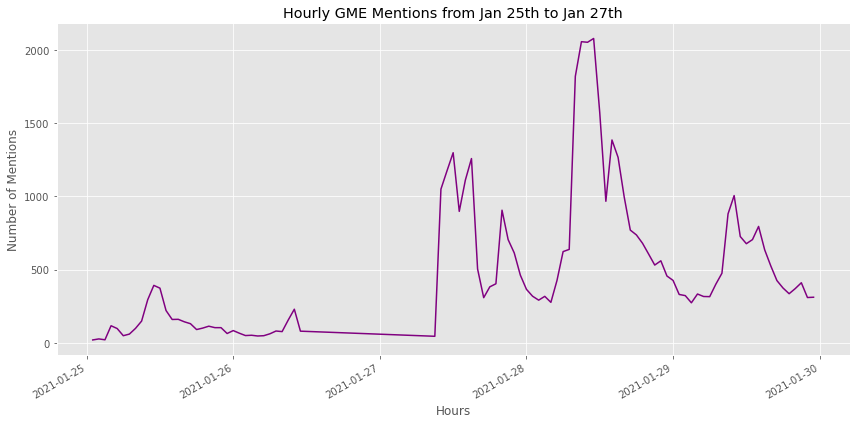

In [147]:
jan_25 = datetime.strptime('2021-01-25 00:00:00', "%Y-%m-%d %H:%M:%S")
jan_29 = datetime.strptime('2021-01-29 23:00:00', "%Y-%m-%d %H:%M:%S")

gme_hour = wsb_full.groupby(['title','date_hour']).count().reset_index()
gme_hour = gme_hour[(gme_hour['title'] == 'gme') & (gme_hour['date_hour'] > jan_25)&
                    (gme_hour['date_hour'] <= jan_29)]


gme_hour = gme_hour.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_hour = gme_hour.rename(columns = {'title':'title','date_hour' : 'date', 'date': 'count'})


x = gme_hour['date']
y = gme_hour['count']

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x,y, color = 'purple')
ax.set_title('Hourly GME Mentions from Jan 25th to Jan 27th')
ax.set_xlabel('Hours')
ax.set_ylabel('Number of Mentions')
fig.autofmt_xdate()
fig.tight_layout()


In [150]:
### Use alpha vantage to gather daily and hourly stock data ###


from alpha_vantage.timeseries import TimeSeries

API_key = 'OZHBQ2Q48QC0NFRZ'

ts = TimeSeries(key = API_key,output_format='pandas')
data = ts.get_daily_adjusted('GME')
gme = data[0].reset_index()
gme_daily = gme[(gme['date'] >= '2020-12-31') & (gme['date'] <= '2021-02-16')]
gme_daily.to_csv('gme_daily_prices')
gme_daily=gme_daily.sort_values('date', ascending=True)




data = ts.get_intraday('GME', interval = '60min', outputsize='full')
gme = data[0].reset_index()
gme_hourly = gme[(gme['date'] >= '2021-01-25') & (gme['date'] <= '2021-01-29')]
gme_hourly = gme_hourly.sort_values('date', ascending=True)



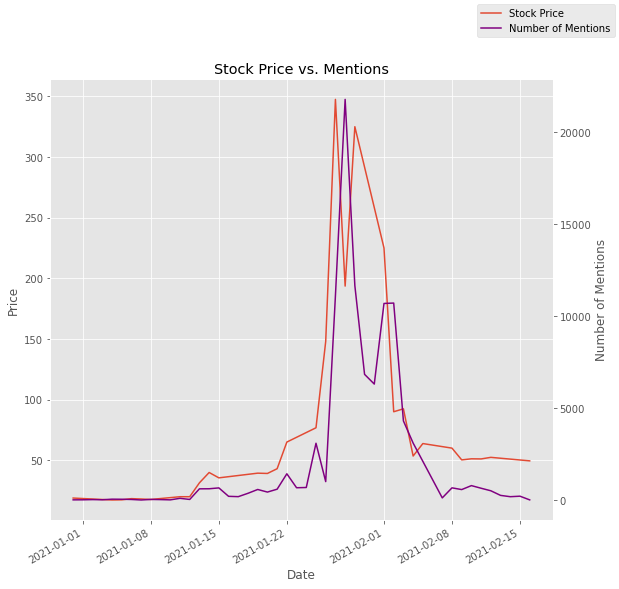

In [151]:
fig, ax1 = plt.subplots(figsize = (9,9))
ax2 = ax1.twinx()


ax1.plot(gme_daily['date'], gme_daily['5. adjusted close'], label = 'Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Stock Price vs. Mentions')


x = gme_date['date']
y = gme_date['count']

ax2.plot(x,y, color = 'purple', label = 'Number of Mentions')
ax2.grid(b=False)
ax2.set_ylabel('Number of Mentions')


fig.autofmt_xdate()
fig.legend()

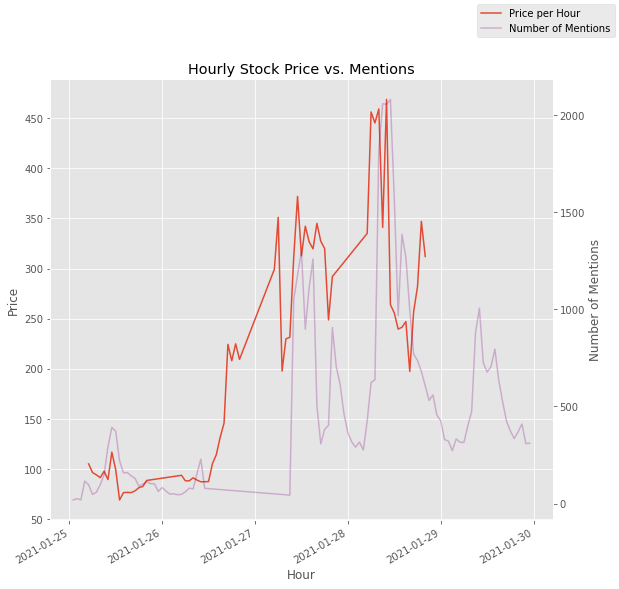

In [154]:
fig, ax1 = plt.subplots(figsize = (9,9))
ax2 = ax1.twinx()

ax1.plot(gme_hourly['date'], gme_hourly['4. close'], label = 'Price per Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Price')
ax1.set_title('Hourly Stock Price vs. Mentions')


x = gme_hour['date']
y = gme_hour['count']

ax2.plot(x,y, color = 'purple', label = 'Number of Mentions', alpha=.25)
ax2.grid(b=False)
ax2.set_ylabel('Number of Mentions')


fig.autofmt_xdate()
fig.legend()